# House pricing prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

### Loading data

In [3]:
train_file_path = 'data/train.csv'
test_file_path = 'data/test.csv'
prices_file_path ='data/sample_submission.csv'


df_house_info = pd.read_csv(train_file_path)
df_house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Review Data

In [4]:
df_house_info.info()  # check what values are contained in the data and their type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

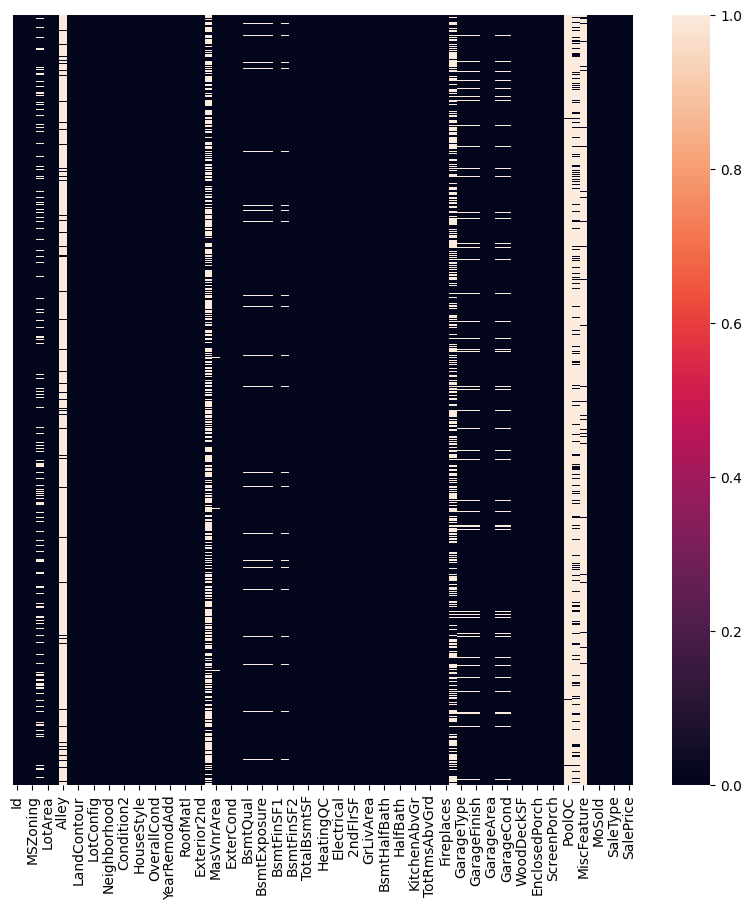

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df_house_info),yticklabels=False)

In [6]:
df_house_info.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# As of today, how old is the newest home
newest_home_age = datetime.date.today().year - df_house_info.YearBuilt.max()

# What is the average lot size (rounded to nearest integer)?
avg_lot_size = df_house_info.LotArea.mean().round(0)

In [8]:
df_house_info.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Specify Prediction Target

In [9]:
# Specify prediction target
y = df_house_info.SalePrice

# Create the list of features 
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features
X = df_house_info[feature_names]

In [10]:
# Review data
# statistics from X
print(X.describe())

# top few lines
print(X.head())

             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1460.000000   1460.000000  
mean       2.866438      6.517808  
std        0.815778      1.625393  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
max        8.000000     14.

### Specify and Fit Model

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
# Specify the model
housing_prices_prediction_model = DecisionTreeRegressor(random_state=1)

# Fit the model
housing_prices_prediction_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

### Make Predictions

In [15]:
predicted_home_prices = housing_prices_prediction_model.predict(X)
print(predicted_home_prices)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
mean_absolute_error(y, predicted_home_prices)

62.35433789954339

In [18]:
# Split data into training and testing
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [19]:
# Fit model with the training data
housing_prices_prediction_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [20]:
# Predict with all validation observations
val_predictions = housing_prices_prediction_model.predict(val_X)

In [27]:
# print the top few validation predictions
print(val_predictions)
# print the top few actual prices from validation data
print(val_y)

[186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000.
 262000. 180000. 121000. 175900. 210000. 248900. 131000. 100000. 149350.
 235000. 156000. 149900. 265979. 193500. 377500. 100000. 162900. 145000.
 180000. 582933. 146000. 140000.  91500. 112500. 113000. 145000. 312500.
 110000. 132000. 305000. 128000. 162900. 115000. 110000. 124000. 215200.
 180000.  79000. 192000. 282922. 235000. 132000. 325000.  80000. 237000.
 208300. 100000. 120500. 162000. 153000. 187000. 185750. 335000. 129000.
 124900. 185750. 133700. 127000. 230000. 146800. 157900. 136000. 153575.
 335000. 177500. 143000. 202500. 168500. 105000. 305900. 192000. 190000.
 140200. 134900. 128950. 213000. 108959. 149500. 190000. 175900. 160000.
 250580. 157000. 120500. 147500. 118000. 117000. 110000. 130000. 148500.
 148000. 190000. 130500. 127000. 120500. 135000. 168000. 176432. 128000.
 147000. 260000. 132000. 129500. 171000. 181134. 227875. 189000. 282922.
  94750. 185000. 194000. 159000. 279500. 290000. 13

In [29]:
val_mae = mean_absolute_error(val_y, val_predictions)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 29,653


### Compare Different Tree Sizes

In [30]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [32]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

for num_leaf in candidate_max_leaf_nodes:
    mae = get_mae(num_leaf, train_X, val_X, train_y, val_y)
    print(f'Leaf number: {num_leaf} with MAE = {mae}')

# The best value of max_leaf_nodes = 100

Leaf number: 5 with MAE = 35044.51299744237
Leaf number: 25 with MAE = 29016.41319191076
Leaf number: 50 with MAE = 27405.930473214907
Leaf number: 100 with MAE = 27282.50803885739
Leaf number: 250 with MAE = 27893.822225701646
Leaf number: 500 with MAE = 29454.18598068598


In [34]:
# fit final model with calculated number of leafs
final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)

final_model.fit(train_X, train_y)
val_predictions = final_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 27,283


### Compare different models

In [35]:
from sklearn.ensemble import RandomForestRegressor

##### Random forest

In [37]:
rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X, train_y)

rf_val_mae = mean_absolute_error(rf_model.predict(val_X), val_y)

print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(rf_val_mae))

Validation MAE for best value of max_leaf_nodes: 21,857
